# ⏬ **Importing Libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf


# 🤖 **Load Model**

In [2]:
cnn = tf.keras.models.load_model("trained_model.keras")


# 🤖 **Visualisation and Performing Prediction on Single Image**

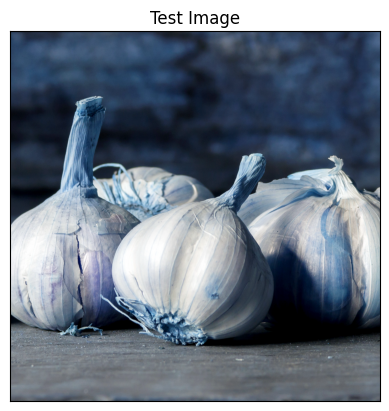

In [3]:
import cv2

image_path = "data/test/garlic/Image_1.jpg" 
img = cv2.imread(image_path)
plt.imshow(img)
plt.title("Test Image")
plt.xticks([])
plt.yticks([])
plt.show()


# 🤖 **Testing Model**

In [4]:
image = tf.keras.preprocessing.image.load_img(image_path, target_size=(64,64))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr]) # Converting single image to batch
predictions = cnn.predict(input_arr)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


In [5]:
print(predictions)

[[2.2856699e-17 3.6615694e-26 5.1345761e-16 7.6210295e-13 3.4393168e-20
  7.8646612e-12 7.7792671e-19 1.2219093e-19 8.2223796e-18 7.8918702e-13
  2.3016458e-18 2.9177052e-22 1.0000000e+00 5.9509987e-13 2.9421206e-18
  6.9260058e-16 2.0536012e-19 7.0105804e-26 1.4197171e-20 8.6461078e-21
  2.9737487e-14 5.1999380e-24 1.0753025e-14 4.3539257e-21 1.1785194e-19
  3.6665049e-10 5.3678251e-17 6.8287104e-21 1.8436116e-12 2.6003080e-18
  1.6149128e-18 1.4612708e-16 1.5905900e-20 1.8138786e-21 1.9775405e-12
  1.7562416e-21]]


In [6]:
test_set = tf.keras.utils.image_dataset_from_directory(
    "./data/test",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 359 files belonging to 36 classes.


In [7]:
test_set.class_names

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

In [12]:
file = open("labels.txt", "w")
for i in test_set.class_names:
    file.write(i+'\n')
file.close()


In [8]:
result_index = np.where(predictions[0] == max(predictions[0]))
print(result_index[0][0])


12


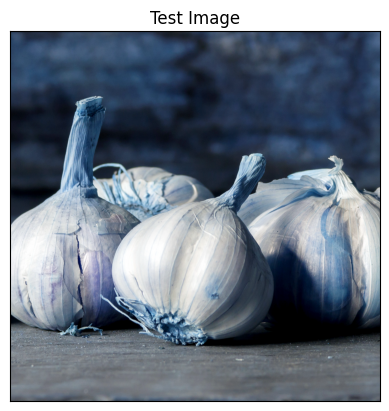

In [9]:
# Display image
plt.imshow(img)
plt.title("Test Image")
plt.xticks([])
plt.yticks([])
plt.show()


In [10]:
# Single Prediction
print("It's a {}".format(test_set.class_names[result_index[0][0]]))

It's a garlic


----------------------------------------------------------------- END ------------------------------------------------------------------